# Book Rental Recommendation (Project 4)

## DESCRIPTION

Book Rent is the largest online and offline book rental chain in India. They provide books of various genres, such as thrillers, mysteries, romances, and science fiction. The company charges a fixed rental fee for a book per month. Lately, the company has been losing its user base. The main reason for this is that users are not able to choose the right books for themselves. The company wants to solve this problem and increase its revenue and profit. 

## Project Objective:

You, as an ML expert, should focus on improving the user experience by personalizing it to the user's needs. You have to model a recommendation engine so that users get recommendations for books based on the behavior of similar users. This will ensure that users are renting the books based on their tastes and traits.

**Note:** You have to perform user-based collaborative filtering and item-based collaborative filtering.

## Dataset description:

**BX-Users:** It contains the information of users.
- user_id - These have been anonymized and mapped to integers
- Location - Demographic data is provided
- Age - Demographic data is provided

If available, otherwise, these fields contain NULL-values.
 
**BX-Books:** 
- isbn - Books are identified by their respective ISBNs. Invalid ISBNs have already been removed from the dataset.
- book_title
- book_author
- year_of_publication
- publisher

**BX-Book-Ratings:** Contains the book rating information. 
- user_id
- isbn
- rating - Ratings (`Book-Rating`) are either explicit, expressed on a scale from 1–10 (higher values denoting higher appreciation), or implicit, expressed by 0.

**Note:** Download the “BX-Book-Ratings.csv”, “BX-Books.csv”, “BX-Users.csv”, and “Recommend.csv” using the link given in the Book Rental Recommendation project problem statement.

### Following operations should be performed:
- Read the books dataset and explore it
- Clean up NaN values
- Read the data where ratings are given by users
- Take a quick look at the number of unique users and books
- Convert ISBN variables to numeric numbers in the correct order
- Convert the user_id variable to numeric numbers in the correct order
- Convert both user_id and ISBN to the ordered list, i.e., from 0...n-1
- Re-index the columns to build a matrix
- Split your data into two sets (training and testing)
- Make predictions based on user and item variables
- Use RMSE to evaluate the predictions


## Collaborative Filtering
Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users.

It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the items they like and combines them to create a ranked list of suggestions.

To build a system that can automatically recommend items to users based on the preferences of other users, the first step is to find similar users or items. The second step is to predict the ratings of the items that are not yet rated by a user.

### User-Based Collaborative Filtering

In this type, we find look-alike customers (based on similarity) and offer products that the first customer's look-alike chose in the past. This algorithm is very effective but takes a lot of time and resources. It computes every customer pair information, which takes time. Therefore, for big base platforms, this algorithm is hard to implement without a very strong parallelizing system.

1. Build a matrix of things each user bought or viewed or rated
2. Compute similarity scores between users
3. Find users similar to you
4. Recommend stuff they bought or viewed or rated that you haven’t yet

### Item-Based Collaborative Filtering

It is quite similar to the previous algorithm, but instead of finding customer look-alikes, it tries to find items that look alike. Once we have an item look-alike matrix, we can easily recommend similar items to customers who have purchased an item from the store. This algorithm is far less resource-consuming than user-based collaborative filtering.

1. Find every pair of movies or books that were viewed or read by the same person
2. Measure the similarity of rating across all the users who viewed or read both
3. Sort movies or books by the similarity strength


#### Import Libraries

In [1]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

#### Read the users dataset and explore it

In [2]:
## Read the users dataset and explore it
df_users = pd.read_csv("BX-Users.csv", encoding="latin1", on_bad_lines='skip', low_memory=False)

# Show the information in the dataset
print(df_users.info())
print()
df_users.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278859 entries, 0 to 278858
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278859 non-null  object 
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), object(2)
memory usage: 6.4+ MB
None



,user_id,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [3]:
df_users['user_id'].nunique()

278859

There are 278,859 records in the `Users` dataset containing information of the users like the `user_id`, `location` and `age`.

The data in the `Users` dataset is not really useful for building the `Book Rental Recommendation` system. So, we are not going to use it.

---

### Read the books dataset and explore it

In [4]:
## Read the books dataset and explore it
df_books = pd.read_csv("BX-Books.csv", encoding='latin1', on_bad_lines='skip', low_memory=False)
df_books.head(2)

,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [5]:
# Print the shape for the Books dataset and check for NULL values
print('Number of rows and columns in dataset', df_books.shape)
print()
df_books.info()

Number of rows and columns in dataset (271379, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271379 non-null  object
 1   book_title           271379 non-null  object
 2   book_author          271378 non-null  object
 3   year_of_publication  271379 non-null  object
 4   publisher            271377 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [6]:
# Show the number of uniuqe books (using 'isbn') in the dataset 
df_books.nunique()

isbn                   271379
book_title             242150
book_author            102042
year_of_publication       137
publisher               16823
dtype: int64

In [7]:
# Show some the unique values for the books 'isbn'
df_books['isbn'].unique()

array(['195153448', '2005018', '60973129', ..., '006008667X', '192126040',
       '767409752'], dtype=object)

In [8]:
# Check the total NULL values in each variable
df_books.isna().sum()

isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
dtype: int64

In [9]:
## Display the rows in the books dataset that have NaN values
df_books[df_books.isnull().any(axis=1)]

,isbn,book_title,book_author,year_of_publication,publisher
128896,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129043,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN
187700,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


- There are 271,379 items (books) and 5 features in the `Books` dataset.
- The `isbn` features has 271,379 unique values showing that this feature is acting as the `key` to the dataset with no duplicate `isbn` value.
- There are books with the same title since its number of unique values (242,150) are lesser than the total number of rows (271,379) in the dataset.
- We will remove duplicates (if any) from the final dataset instead of dealing with it in this dataset.
- All the variables, `isbn`, `book_title`, `book_author`, `year_of_publication`, and `publisher` are of `object` type.
- There are only 3 rows with NULL values in the dataset. 
- There is one row of NaN value for the `book_author` column and 2 rows for the `publisher` column.
- These NaN (null) values can be replace with **`Unknown`** value.

### Clean up NaN values

In [10]:
## Clean up NaN values - replace the null values with 'Unknown'
df_books.fillna('Unknown', inplace=True)

# Check to make sure no NULL exists in dataset after clean-up
df_books.isnull().sum()

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
dtype: int64

In [11]:
# Display the rows after cleaning up NaN values to 
# check that the NaN values were replaced by 'Unknown' 
df_books.loc[[128896,129043,187700],]

,isbn,book_title,book_author,year_of_publication,publisher
128896,193169656X,Tyrant Moon,Elaine Corvidae,2002,Unknown
129043,1931696993,Finders Keepers,Linnea Sinclair,2001,Unknown
187700,9627982032,The Credit Suisse Guide to Managing Your Perso...,Unknown,1995,Edinburgh Financial Publishing


### Read the data where ratings are given by users

In [12]:
## Read the data where ratings are given by users
df_ratings = pd.read_csv("BX-Book-Ratings.csv", encoding='latin1', on_bad_lines='skip', low_memory=False)

# Show the first 2 rows in the dataframe
df_ratings.head(2)

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5


#### Explore the book `Ratings` dataset

In [13]:
## Check the shape and information of the dataset
print('The shape of the dataset is:', df_ratings.shape, '\n')

df_ratings.info()

The shape of the dataset is: (1048575, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1048575 non-null  int64 
 1   isbn     1048575 non-null  object
 2   rating   1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [14]:
# Check for NULL values
df_ratings.isna().any()

user_id    False
isbn       False
rating     False
dtype: bool

In [15]:
# Take a quick look at the number of unique values in the book 'Ratings' dataset 
df_ratings.nunique()

user_id     95513
isbn       322102
rating         11
dtype: int64

- There are 1,048,575 rows and 3 columns in this dataset.
- There are no NULL values in this dataset.
- The data type for the `user_id` and `rating` variables are numeric.
- The `isbn` variable is of object dtype.
- There are 95,513 unique users (`user_id`), 322,102 unique books (`isbn`) and 11 unique user ratings (`ratings`) in the`Book Ratings` dataset. 

### Combine the datasets to get a merged book 'Ratings` dataset
- Merge the `Books` and book `Ratings` datasets using the `isbn` as the key with `inner` join to get the books rated by users.
- The `inner` join merge ensures that the book is available for recommendation.

In [16]:
## Merge the book 'Ratings' and 'Books' datasets with inner join using key 'isbn'. Show the first 2 rows.
df_merged_ratings = pd.merge(df_ratings, df_books, how='inner', on='isbn')
df_merged_ratings.head(2)

,user_id,isbn,rating,book_title,book_author,year_of_publication,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


#### Explore the merged book `Ratings` dataset

In [17]:
## Print the shape for the final 'Book Ratings' dataset and check for NULL values
print("Number of rows and columns in merged book 'Ratings':", df_merged_ratings.shape)
print()
df_merged_ratings.info()

Number of rows and columns in merged book 'Ratings': (941148, 7)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941148 entries, 0 to 941147
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   user_id              941148 non-null  int64 
 1   isbn                 941148 non-null  object
 2   rating               941148 non-null  int64 
 3   book_title           941148 non-null  object
 4   book_author          941148 non-null  object
 5   year_of_publication  941148 non-null  object
 6   publisher            941148 non-null  object
dtypes: int64(2), object(5)
memory usage: 57.4+ MB


In [18]:
## Check for NULL values
df_merged_ratings.isna().sum()

user_id                0
isbn                   0
rating                 0
book_title             0
book_author            0
year_of_publication    0
publisher              0
dtype: int64

In [19]:
# Take a look at the number of unique values in the 'Book Ratings' dataset
df_merged_ratings.nunique()

user_id                 83644
isbn                   257832
rating                     11
book_title             230238
book_author             97246
year_of_publication       133
publisher               16135
dtype: int64

- The merged dataset has 941,148 records and 7 features.
- There are no NULL values in the dataset.
- The `user_id` and `rating` features are numeric of dtype int64.
- The `isbn`, `book_title`, `book_author`, `year_of_publication`, and `publisher` features are of dtype object.
- There are 83,644 unique `user_id`, 257,832 unique `isbn` and 11 unique `rating` values in this dataset.
- The `book_title`, `book_author`, `year_of_publication`, and `publisher` pertains to the `isbn` providing information to the book being referenced.

#### Check for duplicates
- Check to see if there are any duplicate book titles written by the same author and published by same publisher in the same year that were rated by the same user.

In [20]:
# Check for duplicates with same book title, author, year of publication and publisher that are rated by the same user
df_merged_ratings[df_merged_ratings.duplicated(subset=['user_id','book_title','book_author', 'year_of_publication', 'publisher'], 
                                               keep=False)].sort_values(by=['book_title', 'rating'])

,user_id,isbn,rating,book_title,book_author,year_of_publication,publisher
217081,11676,446519960,1,Absolute Power,David Baldacci,1996,Warner Books
97068,11676,446603589,7,Absolute Power,David Baldacci,1996,Warner Books
485385,240258,059043389X,0,Adventures of Huckleberry Finn,Mark Twain,1987,Scholastic
557058,240258,590408011,0,Adventures of Huckleberry Finn,Mark Twain,1987,Scholastic
848290,171118,749746017,0,Afterdark (Afterdark),Annie Dalton,2001,Mammoth
...,...,...,...,...,...,...,...
868326,159973,965078736,0,Yahoodywho,Kathy Griffin,2001,Mibs Publishing
723331,63714,1569317658,10,Zoids Chaotic Century (Zoids: Chaotic Century ...,Michiro Ueyama,2002,Viz Comics
723332,63714,1569317666,10,Zoids Chaotic Century (Zoids: Chaotic Century ...,Michiro Ueyama,2002,Viz Comics
723333,63714,1569317674,10,Zoids Chaotic Century (Zoids: Chaotic Century ...,Michiro Ueyama,2002,Viz Comics


- There are 362 duplicates books in the merged book `Ratings` dataset rated same users.

#### Remove duplicates from the merged book `Ratings` dataset
- Remove the duplicates from the dataset, keeping only the last record with the highest rating after sorting by book title and rating.
- Check to make sure there are no more duplicates after removal.
- Explore the cleaned-up dataset. 

In [21]:
# Remove the duplicated books with same title, author, year of publication and publisher, keeping only the highest rating record
df_nodup_ratings = df_merged_ratings.drop_duplicates(subset=['user_id','book_title','book_author', 'year_of_publication', 'publisher'], 
                                                     keep='last').sort_values(by=['book_title', 'rating']).reset_index(drop=True)

In [22]:
# Check to make sure there are no more duplicates after the removal
df_nodup_ratings[df_nodup_ratings.duplicated(subset=['user_id','book_title','book_author', 'year_of_publication', 'publisher'], keep=False)]

,user_id,isbn,rating,book_title,book_author,year_of_publication,publisher


In [23]:
# Explore the cleaned-up datasest
print('Number of rows and columns in dataset:', df_nodup_ratings.shape)
print()
df_nodup_ratings.head()

Number of rows and columns in dataset: (940948, 7)



,user_id,isbn,rating,book_title,book_author,year_of_publication,publisher
0,18995,590567330,0,A Light in the Storm: The Civil War Diary of ...,Karen Hesse,1999,Hyperion Books for Children
1,35859,590567330,0,A Light in the Storm: The Civil War Diary of ...,Karen Hesse,1999,Hyperion Books for Children
2,55927,590567330,0,A Light in the Storm: The Civil War Diary of ...,Karen Hesse,1999,Hyperion Books for Children
3,96448,590567330,9,A Light in the Storm: The Civil War Diary of ...,Karen Hesse,1999,Hyperion Books for Children
4,172742,964147726,0,Always Have Popsicles,Rebecca Harvin,1994,Rebecca L. Harvin


In [24]:
# Display the info() of the dataset
df_nodup_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940948 entries, 0 to 940947
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   user_id              940948 non-null  int64 
 1   isbn                 940948 non-null  object
 2   rating               940948 non-null  int64 
 3   book_title           940948 non-null  object
 4   book_author          940948 non-null  object
 5   year_of_publication  940948 non-null  object
 6   publisher            940948 non-null  object
dtypes: int64(2), object(5)
memory usage: 50.3+ MB


In [25]:
# Look at the number of unique values in the dataset
df_nodup_ratings.nunique()

user_id                 83644
isbn                   257756
rating                     11
book_title             230238
book_author             97246
year_of_publication       133
publisher               16135
dtype: int64

- There are 940,948 records and 7 features remaining after removing duplicates from the dataset.
- There are no NULL values in this dataset.
- There are 83,644 unique `user_id`, 257,756 unique `isbn` and 11 unique `rating` values in the dataset.

#### Take a quick look at the number of unique ratings in the no duplicate book `Ratings` dataset

In [26]:
# Show the unique values for 'rating'
np.sort(df_nodup_ratings['rating'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [27]:
# Show the value counts for the 'rating'
df_nodup_ratings['rating'].value_counts()

0     589171
8      84140
10     65072
7      60816
9      55956
5      41799
6      28973
4       6860
3       4683
2       2138
1       1340
Name: rating, dtype: int64

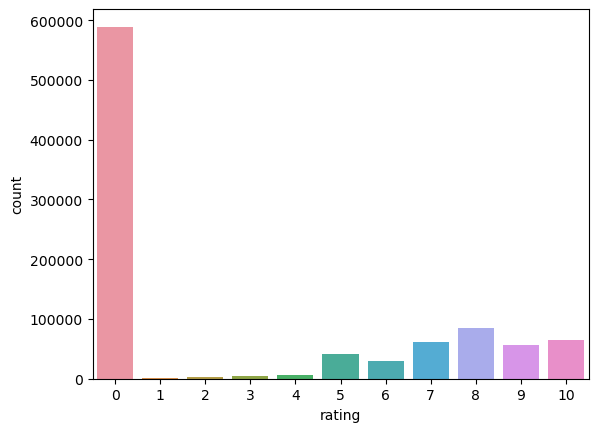

In [28]:
# Display a countplot for the 'rating'
sns.countplot(data=df_nodup_ratings, x='rating');

In [29]:
print('There are', df_nodup_ratings[df_nodup_ratings['rating'] == 0].shape[0], 'records with rating of 0 value')

There are 589171 records with rating of 0 value


- The unique `rating` value range from `0 ~ 10`.
- There are 589,171 ratings with `0` value. 
- It is not clear whether the `0` value indicates that no rating had been provided by the user or that the users just rated with the lowest rating. 
- Regardless of whether the `0` rating is for the lowest rating or for not rated books, these data are not going to be useful for the recommendation system since we are not going to recommend books that have the lowest rating.
- So, let's remove the records with `0` ratings from the dataset.

#### Remove data with `0` rating from the no duplicate book `Ratings` dataset

In [30]:
# Keep only data with rating greater than 0
df_nonzero_ratings = df_nodup_ratings[df_nodup_ratings['rating'] > 0].reset_index(drop=True)
print("Dimension of dataframe with non-zero rating:", df_nonzero_ratings.shape)
print()
df_nonzero_ratings.head()

Dimension of dataframe with non-zero rating: (351777, 7)



,user_id,isbn,rating,book_title,book_author,year_of_publication,publisher
0,96448,590567330,9,A Light in the Storm: The Civil War Diary of ...,Karen Hesse,1999,Hyperion Books for Children
1,98391,399151788,10,Dark Justice,Jack Higgins,2004,Putnam Publishing Group
2,179730,006250746X,1,Earth Prayers From around the World: 365 Pray...,Elizabeth Roberts,1991,HarperSanFrancisco
3,179744,006250746X,6,Earth Prayers From around the World: 365 Pray...,Elizabeth Roberts,1991,HarperSanFrancisco
4,121592,006250746X,7,Earth Prayers From around the World: 365 Pray...,Elizabeth Roberts,1991,HarperSanFrancisco


In [31]:
# Show the number of unique values for the features in the dataset
df_nonzero_ratings.nunique()

user_id                 61875
isbn                   141987
rating                     10
book_title             128583
book_author             59137
year_of_publication       111
publisher               11130
dtype: int64

- After removing `0` rating from the no duplicate book `Ratings` dataset, there are 351,777 records left.
- There are now 61,875 unique `user_id`, 141,987 unique `isbn` and 10 unique `rating` in the dataset.
- Even after cleaning up the dataset, it is still a huge dataset that might cause memory issue in using collaborative filtering.
- To keep the usage of memory manageable in using collaborative filtering, we need to reduce the dataset further. 
- Due to the **`user cold start`** problem in recommender systems where new users had rated only a few books or new books were being rated only by a few users causing lack of information to model users or item similarity, we can choose to use records that had more than a specific `threshold` number of ratings to work with.
- So, let's take a quick look at the number of unique users and books to find the users and books to remove from the dataset.


### Take a quick look at the number of unique users and books

In [32]:
df_nonzero_ratings['user_id'].value_counts()

11676     6935
98391     5691
189835    1894
153662    1847
23902     1180
          ... 
94292        1
111277       1
160712       1
208635       1
229149       1
Name: user_id, Length: 61875, dtype: int64

In [33]:
df_nonzero_ratings['isbn'].value_counts()

316666343     635
971880107     526
385504209     451
312195516     354
60928336      292
             ... 
375419071       1
553232312       1
345337921       1
908011202       1
2842192508      1
Name: isbn, Length: 141987, dtype: int64

- There are records in the dataset that only have 1 rating for either the user (`user_id`) or book (`isbn`).
- The `Rental Book Recommmendation System` is going to be build on similarity between the users or the books.
- If a book had only being rated by 1 user or a user had only rated 1 book then it might not be possible to find similarity between the users or books.
- Let's remove the books that had only being rated by 1 or less than the `threshold` number of ratings from the `Book Ratings` dataset.

#### Remove records that have lesser than the `threshold` number of ratings from the non-zero book `Ratings` dataset

In [34]:
# Function to group ratings by the specified kind ('isbn' or 'user_id') and count the number of rating for the kind

def get_aggregated_ratings(data, kind='isbn', threshold=1):
    '''
    This function returns a dataframe containg the item and its rating count.
    It takes a dataframe with the item and its 'rating' and returns the set of
    data that have 'rating' greater than the specified threshold (default to 1)
    '''
    # Group ratings by kind, get its rating count (num_ratings) to determine aggregated ratings to keep
    agg_ratings = data.groupby(kind).agg(num_ratings=('rating','count')).reset_index()

    # Keep the items with more than 'threshold' ratings
    agg_item_ratings = agg_ratings[agg_ratings['num_ratings'] > threshold]

    return agg_item_ratings

In [35]:
# Get the books with more than the 'threshold' number of ratings
books = get_aggregated_ratings(data=df_nonzero_ratings, kind='isbn', threshold=2)
print(books.shape)
books.head(2)

(25477, 2)


,isbn,num_ratings
20,000617616X,3
28,000648302X,10


In [36]:
# Get the users with more than the 'threshold' number of ratings
users = get_aggregated_ratings(data=df_nonzero_ratings, kind='user_id', threshold=2)
print(users.shape)
users.head(2)

(18335, 2)


,user_id,num_ratings
0,8,7
3,14,3


In [37]:
# Get book ratings that were in both list of users or books that have more than the threshold number of ratings 
# so as not to have a book that had been rated by only one user in the dataset

df_book_ratings = df_nonzero_ratings[(df_nonzero_ratings['user_id'].isin(users['user_id'])) & 
                                     (df_nonzero_ratings['isbn'].isin(books['isbn']))].reset_index(drop=True)

#### Explore the `Book Ratings` dataset

In [38]:
# Show the shape of the dataframe and the first 5 rows
print(df_book_ratings.shape)
print()
df_book_ratings.head()

(179379, 7)



,user_id,isbn,rating,book_title,book_author,year_of_publication,publisher
0,179730,006250746X,1,Earth Prayers From around the World: 365 Pray...,Elizabeth Roberts,1991,HarperSanFrancisco
1,179744,006250746X,6,Earth Prayers From around the World: 365 Pray...,Elizabeth Roberts,1991,HarperSanFrancisco
2,121592,006250746X,7,Earth Prayers From around the World: 365 Pray...,Elizabeth Roberts,1991,HarperSanFrancisco
3,211137,006250746X,7,Earth Prayers From around the World: 365 Pray...,Elizabeth Roberts,1991,HarperSanFrancisco
4,26544,006250746X,9,Earth Prayers From around the World: 365 Pray...,Elizabeth Roberts,1991,HarperSanFrancisco


In [39]:
# Explore the 'Book Ratings' dataset
print('Check if dataset has NULL values:')
print(df_book_ratings.isna().sum())
print()
print('Look at the dataset info():')
df_book_ratings.info()

Check if dataset has NULL values:
user_id                0
isbn                   0
rating                 0
book_title             0
book_author            0
year_of_publication    0
publisher              0
dtype: int64

Look at the dataset info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179379 entries, 0 to 179378
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   user_id              179379 non-null  int64 
 1   isbn                 179379 non-null  object
 2   rating               179379 non-null  int64 
 3   book_title           179379 non-null  object
 4   book_author          179379 non-null  object
 5   year_of_publication  179379 non-null  object
 6   publisher            179379 non-null  object
dtypes: int64(2), object(5)
memory usage: 9.6+ MB


In [40]:
# Show the number of unique value in the dataset
df_book_ratings.nunique()

user_id                17630
isbn                   25376
rating                    10
book_title             22563
book_author             9232
year_of_publication       77
publisher               1858
dtype: int64

- There are 179,379 rows and 7 columns remaining in the `Book Ratings` dataset after removing books that are less than or equal to `2` number of ratings.
- There are no NULL values in the dataset
- There are now 17,630 unique `user_id`, 25,376 unique `isbn` and 10 unique `rating` in the dataset.

#### Convert ISBN variables to numeric numbers in the correct order
- Create a function to convert the ISBN values to a numeric values in an order from 0...n-1

In [41]:
## Convert ISBN variables to numeric numbers in the correct order

isbn_list = df_book_ratings['isbn'].unique()

## Write a function to convert ISBN to ordered numeric values (0...n-1)
def get_isbn_order(isbn):
    return np.where(isbn_list==isbn)[0][0]

#### Convert the user_id variable to numeric numbers in the correct order
- Create a function to convert the user_id variable in a numeric order from 0...n-1

In [42]:
## Convert the user_id variable to numeric numbers in the correct order
user_id_list = df_book_ratings['user_id'].unique()
 
## Write a function to convert user_id to ordered numeric values (0...n-1)
def get_user_id_order(user_id):
    return np.where(user_id_list==user_id)[0][0]

#### Convert both user_id and ISBN to the ordered list, i.e., from 0...n-1

In [43]:
## Convert both user_id and isbn to the ordered list, i.e., from 0...n-1

df_book_ratings['isbn_id'] = df_book_ratings['isbn'].apply(get_isbn_order)
df_book_ratings['user'] = df_book_ratings['user_id'].apply(get_user_id_order)
df_book_ratings.head()

,user_id,isbn,rating,book_title,book_author,year_of_publication,publisher,isbn_id,user
0,179730,006250746X,1,Earth Prayers From around the World: 365 Pray...,Elizabeth Roberts,1991,HarperSanFrancisco,0,0
1,179744,006250746X,6,Earth Prayers From around the World: 365 Pray...,Elizabeth Roberts,1991,HarperSanFrancisco,0,1
2,121592,006250746X,7,Earth Prayers From around the World: 365 Pray...,Elizabeth Roberts,1991,HarperSanFrancisco,0,2
3,211137,006250746X,7,Earth Prayers From around the World: 365 Pray...,Elizabeth Roberts,1991,HarperSanFrancisco,0,3
4,26544,006250746X,9,Earth Prayers From around the World: 365 Pray...,Elizabeth Roberts,1991,HarperSanFrancisco,0,4


In [44]:
print(df_book_ratings.shape)
print()
df_book_ratings.nunique()

(179379, 9)



user_id                17630
isbn                   25376
rating                    10
book_title             22563
book_author             9232
year_of_publication       77
publisher               1858
isbn_id                25376
user                   17630
dtype: int64

- 2 columns, `isbn_id` and `user` had been added to the DataFrame to store the ordered `isbn` and `user_id` respectively.
- Use these 2 new columns and the `rating` column to build a `user-item` matrix (using pandas pivot)

#### Re-index the columns to build a matrix
- The `user-item` matrix will have a lot of NULL values since not all the users rate all the books.
- Replace these NULL values with 0 when building the matrix since most algorithms do not work well with NULL values in the dataset.
- The `user-item` matrix will have rows of users (`user`) and columns of books (`isbn_id`).
- It should be a 17,630 (users) x 25,376 (isbn_id) matrix.
- The value of 0 is used to fill the NULL values in the sparse `user-item` matrix that represents books (isbn_id) that were not rated by users.

In [45]:
## Re-index the columns to build a matrix

# Collaborative Filtering: user-item matrix
user_item_matrix = df_book_ratings.pivot(index='user', columns='isbn_id', values='rating').fillna(0)
user_item_matrix

isbn_id,0,1,2,3,4,5,6,7,8,9,...,25366,25367,25368,25369,25370,25371,25372,25373,25374,25375
user,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Split your data into two sets (training and testing)
- Split the data in the `user_item_matrix` into 2 sets, (80% training and 20% testing data). 

In [46]:
## Split your data into two sets (training and testing)

#train_data, test_data = train_test_split(test, test_size=0.2, random_state=42)
train_data, test_data = train_test_split(user_item_matrix, test_size=0.2, random_state=42)

# Check shape of both datasets
print('Train data shape:', train_data.shape, 'Test data shape:', test_data.shape)
print()

# Show first 5 rows of train_data
train_data.head()


Train data shape: (14104, 25376) Test data shape: (3526, 25376)



isbn_id,0,1,2,3,4,5,6,7,8,9,...,25366,25367,25368,25369,25370,25371,25372,25373,25374,25375
user,,,,,,,,,,,,,,,,,,,,,
7831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- There are 20,199 users and 46,339 books ratings in the `training` dataset and 5,050 users and 46,339 books ratings in the `testing` dataset.

#### Make predictions based on user and item variables 
1. Find similarity matrix for `user` and `item` individually using the `training` dataset splitted from the `user-item matrix`.
    1. The `train_data` have the same format as the `user-item` matrix with the rows as `users` and columns as `items`.
    2. Using the `cosine_similarity` function from `sklearn.metrics.pairwise`:
        - build a `user` similarity matrix with both the rows and columns as users
        - similarly, build an `item` similarity matrix with both the rows and columns as items
2. Predict ratings based on user and item variables, computing with the `user-item` matrix and its respective `similiarity` matrix

In [47]:
## Make predictions based on user and item variables

# 1. Find similarity matrix for user and item using
#    the training data (splitted from the user-item matrix)

# Get the similarity matrix for the user using the user-item matrix 
user_similarity = cosine_similarity(train_data)

# Transpose the user-item matrix since item (isbn) are the columns to get the similarity matrix
item_similarity = cosine_similarity(train_data.T)


In [48]:
# Display parts of the user_similarity matrix
print('User Similarity Matrix is:', user_similarity.shape, 'of type:', type(user_similarity))
print()
print(user_similarity)


User Similarity Matrix is: (14104, 14104) of type: <class 'numpy.ndarray'>

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [49]:
# Create the dataframe for user_similarity for easy viewing
df_user_similarity = pd.DataFrame(user_similarity, index=train_data.index, columns=train_data.index)
df_user_similarity

user,7831,17596,7793,2236,10027,11017,12596,1747,2656,13344,...,11363,14423,4426,16850,6265,11284,11964,5390,860,15795
user,,,,,,,,,,,,,,,,,,,,,
7831,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17596,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7793,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2236,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10027,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [50]:
# Display parts of the item_similarity matrix
print('Item Similarity Matrix is:', item_similarity.shape, 'of type:', type(item_similarity))
print()
print(item_similarity)


Item Similarity Matrix is: (25376, 25376) of type: <class 'numpy.ndarray'>

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [51]:
# Create the dataframe for item_similarity for easy viewing
df_item_similarity = pd.DataFrame(item_similarity, index=train_data.columns, columns=train_data.columns)
df_item_similarity

isbn_id,0,1,2,3,4,5,6,7,8,9,...,25366,25367,25368,25369,25370,25371,25372,25373,25374,25375
isbn_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.364090,...,0.0,0.0,0.0,0.0,0.0,0.373152,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25371,0.0,0.0,0.0,0.373152,0.0,0.0,0.0,0.0,0.0,0.367328,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0
25372,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0
25373,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0


In [52]:
# Create function to return no bias predictions for specified kind of collaborative filtering

def predict(ratings, similarity, kind='user'):
    '''
    This method returns either the 'user' or 'item' 
    collaborative filtering predictions.
    '''
    # The similarity_sum value is going to be used as a denominator in the 
    # prediction computation. To avoid 'divide-by-zero' error: 
    # Set the value to 1 if the summation of the similarity values is 0.
    
    if kind == 'user':
        # Prediction = similarity dot product ratings divide 
        # by absolute sum of transposed rows in similarity matrix
        pred = similarity.dot(ratings) / np.array([np.abs(similarity).sum(axis=1)]).T

    elif kind == 'item':
        # Prediction = ratings dot product similarity 
        # divide by absolute sum of rows in similarity matrix
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
        
        # if any NULL generated in the predictions, convert it to 0
        pred = pred.fillna(0)
        
        # Convert to numpy array since the 'user' prediction is a numpy array
        pred = pred.to_numpy()

    return pred

In [53]:
## Get predictions for user and item collaborative filtering

user_predictions = predict(train_data, user_similarity, kind='user')
item_predictions = predict(train_data, item_similarity, kind='item')


In [54]:
# Show the shape and 1st 5 rows of the user prediction matrix
print('User-based predictions:', user_predictions.shape)
print()
print(type(user_predictions))
print()
print(user_predictions[:5,:])


User-based predictions: (14104, 25376)

<class 'numpy.ndarray'>

[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.0042416 0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]


In [55]:
# Create dataframe for the user_predictions
df_user_predictions = pd.DataFrame(user_predictions, index=train_data.index, columns=train_data.columns)
df_user_predictions.head()

isbn_id,0,1,2,3,4,5,6,7,8,9,...,25366,25367,25368,25369,25370,25371,25372,25373,25374,25375
user,,,,,,,,,,,,,,,,,,,,,
7831,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
17596,0.0,0.004242,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.001396,0.00000,0.0,0.0,0.0,0.0
7793,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
2236,0.0,0.000000,0.0,0.0,0.0,0.0,0.05942,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
10027,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.02225,0.0,0.0,0.0,0.0


In [56]:
# Show the shape and 1st 5 rows of the item prediction matrix
print('\nItem-based predictions:', item_predictions.shape)
print()
print(type(item_predictions))
print()
print(item_predictions[:5,:])


Item-based predictions: (14104, 25376)

<class 'numpy.ndarray'>

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00380007 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [57]:
# Create dataframe for the item_predictions
df_item_predictions = pd.DataFrame(item_predictions, index=train_data.index, columns=train_data.columns)
df_item_predictions.head()

isbn_id,0,1,2,3,4,5,6,7,8,9,...,25366,25367,25368,25369,25370,25371,25372,25373,25374,25375
user,,,,,,,,,,,,,,,,,,,,,
7831,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
17596,0.0,0.0038,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000196,0.000000,0.0,0.0,0.0,0.0
7793,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2236,0.0,0.0000,0.0,0.0,0.0,0.0,0.030516,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
10027,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000838,0.0,0.0,0.0,0.0


#### Use RMSE to evaluate the predictions
- Create a function to evaluate RMSE
- The `pred` and `actual` parameters are numpy arrays.
- The `actual.nonzero()` numpy function call gets the indices (i,j) of non-zero elements 
- Using the non-zero element indices, find the prediction at those indices
- Flatten the result into a single array
- The RMSE is the square-root of the mean squared error for the predicted and actual value.

In [58]:
## Use RMSE to evaluate the predictions

# Importing RMSE function 
from sklearn.metrics import mean_squared_error
from math import sqrt

# Define function to get the RMSE for the predicted and actual values
def get_rmse(pred, actual):
    # Get the indices of the nonzero elements
    non_zero = actual.nonzero()
    
    pred = pred[non_zero].flatten()
    actual = actual[non_zero].flatten()
    
    return sqrt(mean_squared_error(pred, actual))


In [59]:
actual_data = test_data.to_numpy()

print('User-based CF RMSE:', get_rmse(user_predictions, actual_data))
print('Item-based CF RMSE:', get_rmse(item_predictions, actual_data))


User-based CF RMSE: 7.919204151484236
Item-based CF RMSE: 7.935628642771506


- The RMSE for both the `user-based` and `item-based` CF (Collaborative Filtering) is about the same value.